In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno

In [43]:
# prop16 = pd.read_csv("properties_2016.csv")
# train16= pd.read_csv("train_2016_v2.csv")
# prop17 = pd.read_csv("properties_2017.csv")
submission = pd.read_csv("sample_submission.csv")

In [44]:
submission.shape

(2985217, 7)

In [7]:
train16.shape

(90275, 3)

In [8]:
prop16.shape

(2985217, 58)

In [9]:
prop16.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [10]:
prop17.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,4.0,NaN,NaN,...,1.0,NaN,179072.0,287634.0,2016.0,108562.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,404013.0,563029.0,2016.0,159016.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,103553.0,698984.0,2016.0,595431.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,4.0,NaN,NaN,...,1.0,NaN,221771.0,265184.0,2016.0,43413.0,4054.76,NaN,NaN,NaN


## prop16, prop17 동일 parcelid 비교

In [7]:
df = pd.DataFrame(columns=["2016_parcelid","2017_parcelid"])
df

,2016_parcelid,2017_parcelid


In [8]:
df["2016_parcelid"],df["2017_parcelid"] = prop16["parcelid"], prop17["parcelid"]
df["same parcelid"] = df[df["2016_parcelid"]==df["2017_parcelid"]]["2016_parcelid"]
df

,2016_parcelid,2017_parcelid,same parcelid
0,10754147,10754147,10754147.0
1,10759547,10759547,10759547.0
2,10843547,10843547,10843547.0
3,10859147,10859147,10859147.0
4,10879947,10879947,10879947.0
5,10898347,10898347,10898347.0
6,10933547,10933547,10933547.0
7,10940747,10940747,10940747.0
8,10954547,10954547,10954547.0
9,10976347,10976347,10976347.0


In [11]:
df.head(15)

,2016_parcelid,2017_parcelid,same parcelid
0,10754147,10754147,10754147.0
1,10759547,10759547,10759547.0
2,10843547,10843547,10843547.0
3,10859147,10859147,10859147.0
4,10879947,10879947,10879947.0
5,10898347,10898347,10898347.0
6,10933547,10933547,10933547.0
7,10940747,10940747,10940747.0
8,10954547,10954547,10954547.0
9,10976347,10976347,10976347.0


In [12]:
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame             2016_parcelid  2<...>2985217 rows x 3 columns]
msno       module       <module 'missingno' from <...>s/missingno/__init__.py'>
np         module       <module 'numpy' from '/Li<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/L<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pylab<...>ges/matplotlib/pylab.py'>
prop16     DataFrame              parcelid  airco<...>985217 rows x 58 columns]
prop17     DataFrame             parcelid  aircon<...>985217 rows x 58 columns]
sns        module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
train16    DataFrame           parcelid  logerror<...>n[90275 rows x 3 columns]


In [ ]:
list_16_parcelid = df["2016_parcelid"].tolist()
list_17_parcelid = df["2017_parcelid"].tolist()

In [18]:
list_17_parcelid[:20]

[10754147,
 10759547,
 10843547,
 10859147,
 10879947,
 10898347,
 10933547,
 10940747,
 10954547,
 10976347,
 11070347,
 11073947,
 11114347,
 11116947,
 11142747,
 11193347,
 11215747,
 11229347,
 11287347,
 11288547]

In [21]:
len([i for i in list_16_parcelid[:1000] if i in list_17_parcelid[:3000]])

993

In [16]:
df[df["2016_parcelid"]==df["2017_parcelid"]]

,2016_parcelid,2017_parcelid,same parcelid
0,10754147,10754147,10754147.0
1,10759547,10759547,10759547.0
2,10843547,10843547,10843547.0
3,10859147,10859147,10859147.0
4,10879947,10879947,10879947.0
5,10898347,10898347,10898347.0
6,10933547,10933547,10933547.0
7,10940747,10940747,10940747.0
8,10954547,10954547,10954547.0
9,10976347,10976347,10976347.0


In [17]:
prop17["parcelid"]

0          10754147
1          10759547
2          10843547
3          10859147
4          10879947
5          10898347
6          10933547
7          10940747
8          10954547
9          10976347
10         11070347
11         11073947
12         11114347
13         11116947
14         11142747
15         11193347
16         11215747
17         11229347
18         11287347
19         11288547
20         11324547
21         11391347
22         11395747
23         11404347
24         11405747
25         11417147
26         11441547
27         11457547
28         11488147
29         11520747
             ...   
2985187    12913028
2985188    17212628
2985189    12053828
2985190    13113429
2985191    13113229
2985192    13113629
2985193    11684429
2985194    12250229
2985195    11758829
2985196    11758629
2985197    14430829
2985198    13903029
2985199    13113430
2985200    13113230
2985201    13113630
2985202    12614630
2985203    13108830
2985204    10922830
2985205    11758630


# train_2016

## error

### outlier 탐색

In [18]:
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [19]:
range(train16.shape[0])

range(0, 90275)

In [20]:
np.sort(train16.logerror.values)

array([-4.605, -4.605, -4.51 , ...,  4.445,  4.52 ,  4.737])

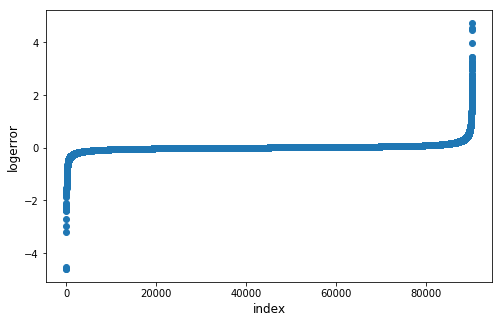

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(range(train16.shape[0]), np.sort(train16.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [22]:
np.percentile(train16.logerror.values, 99)

0.4638819999999963

## transaction date

In [23]:
train16['transactiondate'] = pd.to_datetime(train16['transactiondate'])

In [24]:
train16['transaction_month'] = train16['transactiondate'].dt.month

In [25]:
train16.tail()

,parcelid,logerror,transactiondate,transaction_month
90270,10774160,-0.0356,2016-12-30,12
90271,12046695,0.0070,2016-12-30,12
90272,12995401,-0.2679,2016-12-30,12
90273,11402105,0.0602,2016-12-30,12
90274,12566293,0.4207,2016-12-30,12


In [26]:
np.sort(train16['transaction_month'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
train16['transaction_month'].value_counts()

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transaction_month, dtype: int64

In [28]:
transaction_month = train16['transaction_month'].value_counts()

### month마다 transaction 수

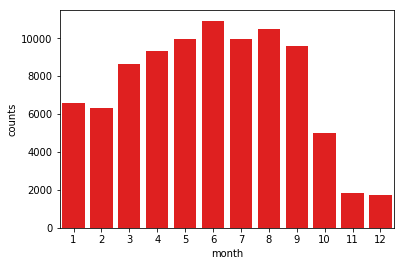

In [29]:
sns.barplot(transaction_month.index, transaction_month.values, color='red')
plt.xlabel('month')
plt.ylabel('counts')
plt.show()

### unique 하지 않은 parcelid

In [30]:
len(train16['parcelid'])

90275

In [31]:
train16['parcelid'].value_counts().head()

11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
Name: parcelid, dtype: int64

In [32]:
train16['parcelid'].value_counts().reset_index().head()

,index,parcelid
0,11842707,3
1,12613442,2
2,12032773,2
3,11729067,2
4,11845988,2


In [33]:
train16['parcelid'].value_counts().reset_index()\
['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

## prop16, prop17 merge Data

In [53]:
prop16_pid_list = prop16['parcelid'].tolist()
prop17_pid_list = prop17['parcelid'].tolist()

In [85]:
merged = pd.merge(prop16.head(10),prop17.head(10),on='parcelid',how="outer")

In [87]:
merged.shape

(10, 115)

In [88]:
merged

,parcelid,airconditioningtypeid_x,architecturalstyletypeid_x,basementsqft_x,bathroomcnt_x,bedroomcnt_x,buildingclasstypeid_x,buildingqualitytypeid_x,calculatedbathnbr_x,decktypeid_x,...,numberofstories_y,fireplaceflag_y,structuretaxvaluedollarcnt_y,taxvaluedollarcnt_y,assessmentyear_y,landtaxvaluedollarcnt_y,taxamount_y,taxdelinquencyflag_y,taxdelinquencyyear_y,censustractandblock_y
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,179072.0,287634.0,2016.0,108562.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,404013.0,563029.0,2016.0,159016.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,103553.0,698984.0,2016.0,595431.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,221771.0,265184.0,2016.0,43413.0,4054.76,NaN,NaN,NaN


In [89]:
merged.transpose()

,0,1,2,3,4,5,6,7,8,9
parcelid,10754147,10759547,10843547,10859147,10879947,10898347,10933547,10940747,10954547,10976347
airconditioningtypeid_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt_x,0,0,0,0,0,0,0,0,0,0
bedroomcnt_x,0,0,0,0,0,0,0,0,0,0
buildingclasstypeid_x,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,3
buildingqualitytypeid_x,NaN,NaN,NaN,7,NaN,7,NaN,NaN,NaN,7
calculatedbathnbr_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
decktypeid_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
merged = pd.merge(prop16.head(10),prop17.head(10),how="outer")

In [91]:
merged.shape

(19, 58)

In [93]:
merged

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [94]:
merged.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
parcelid,10754147,10759547,10843547,10859147,10879947,10898347,10933547,10940747,10954547,10976347,10754147,10843547,10859147,10879947,10898347,10933547,10940747,10954547,10976347
airconditioningtypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bedroomcnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
buildingclasstypeid,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,3,NaN,5,3,4,4,NaN,NaN,NaN,3
buildingqualitytypeid,NaN,NaN,NaN,7,NaN,7,NaN,NaN,NaN,7,NaN,NaN,6,NaN,4,NaN,NaN,NaN,4
calculatedbathnbr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
decktypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
merged['parcelid'].value_counts()

10940747    2
10898347    2
10954547    2
10976347    2
10879947    2
10859147    2
10933547    2
10843547    2
10754147    2
10759547    1
Name: parcelid, dtype: int64

# properties 2016

## Missing Value

In [33]:
list_train16_parcelid= train16['parcelid'].tolist()
list_prop16_parcelid= prop16['parcelid'].tolist()

In [37]:
len(list_train16_parcelid)

90275

In [35]:
list_train16_parcelid[:10]

[11016594,
 14366692,
 12098116,
 12643413,
 14432541,
 11509835,
 12286022,
 17177301,
 14739064,
 14677559]

In [38]:
len(list_prop16_parcelid)

2985217

In [36]:
list_prop16_parcelid

[10754147,
 10759547,
 10843547,
 10859147,
 10879947,
 10898347,
 10933547,
 10940747,
 10954547,
 10976347]

In [42]:
len([i for i in list_train16_parcelid[:100] if i in list_prop16_parcelid])

100

In [45]:
merged = pd.merge(train16,prop16,on="parcelid",how="right")

In [47]:
merged.shape

(2985342, 60)

In [48]:
merged = pd.merge(train16,prop16,on="parcelid",how="left")

In [49]:
merged.shape

(90275, 60)

In [26]:
merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [27]:
merged = pd.merge(train16,prop16,on="parcelid",how="right")

In [28]:
merged.shape

(2985342, 60)

In [29]:
merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [37]:
merged_t = merged.head().transpose()

In [38]:
merged_t.head()

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
transaction_month,1,1,1,1,1
airconditioningtypeid,1,NaN,1,1,NaN


In [39]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
len(missingValueColumns), missingValueColumns

(47,
 ['airconditioningtypeid',
  'architecturalstyletypeid',
  'basementsqft',
  'buildingclasstypeid',
  'buildingqualitytypeid',
  'calculatedbathnbr',
  'decktypeid',
  'finishedfloor1squarefeet',
  'calculatedfinishedsquarefeet',
  'finishedsquarefeet12',
  'finishedsquarefeet13',
  'finishedsquarefeet15',
  'finishedsquarefeet50',
  'finishedsquarefeet6',
  'fireplacecnt',
  'fullbathcnt',
  'garagecarcnt',
  'garagetotalsqft',
  'hashottuborspa',
  'heatingorsystemtypeid',
  'lotsizesquarefeet',
  'poolcnt',
  'poolsizesum',
  'pooltypeid10',
  'pooltypeid2',
  'pooltypeid7',
  'propertycountylandusecode',
  'propertyzoningdesc',
  'regionidcity',
  'regionidneighborhood',
  'regionidzip',
  'storytypeid',
  'threequarterbathnbr',
  'typeconstructiontypeid',
  'unitcnt',
  'yardbuildingsqft17',
  'yardbuildingsqft26',
  'yearbuilt',
  'numberofstories',
  'fireplaceflag',
  'structuretaxvaluedollarcnt',
  'taxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'taxamount',
  'taxdelin

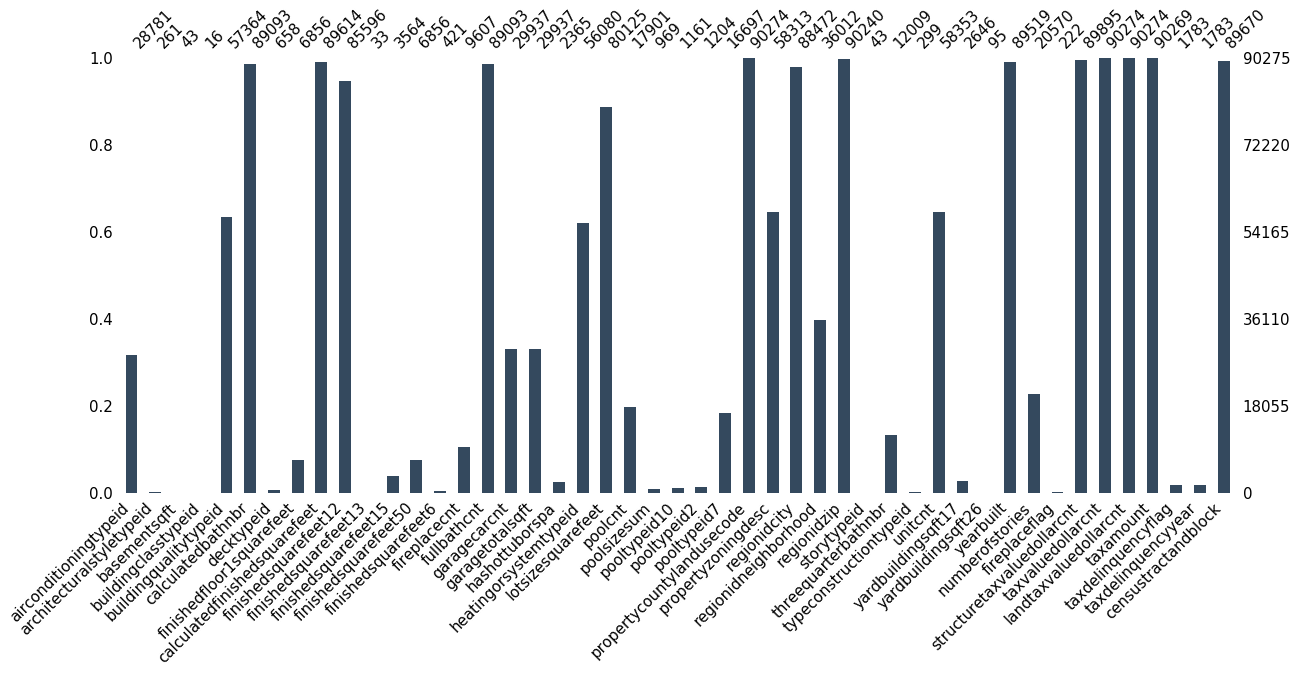

In [40]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=15,labels=True)

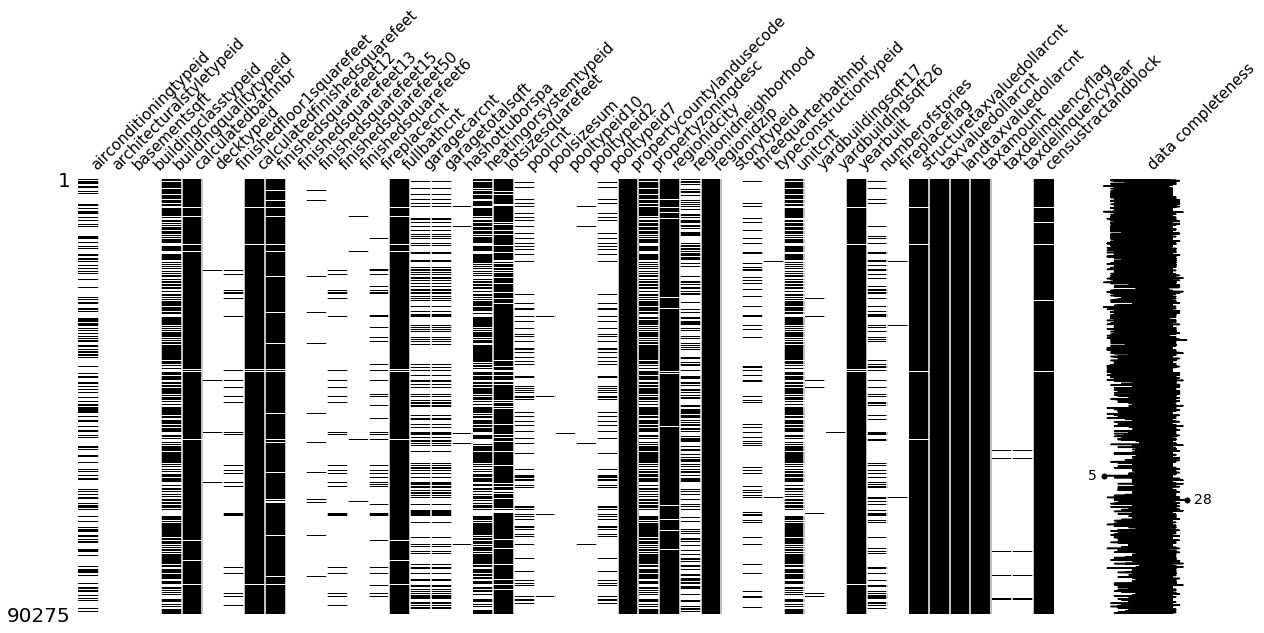

In [41]:
msno.matrix(merged[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=15,sparkline=True,labels=True)

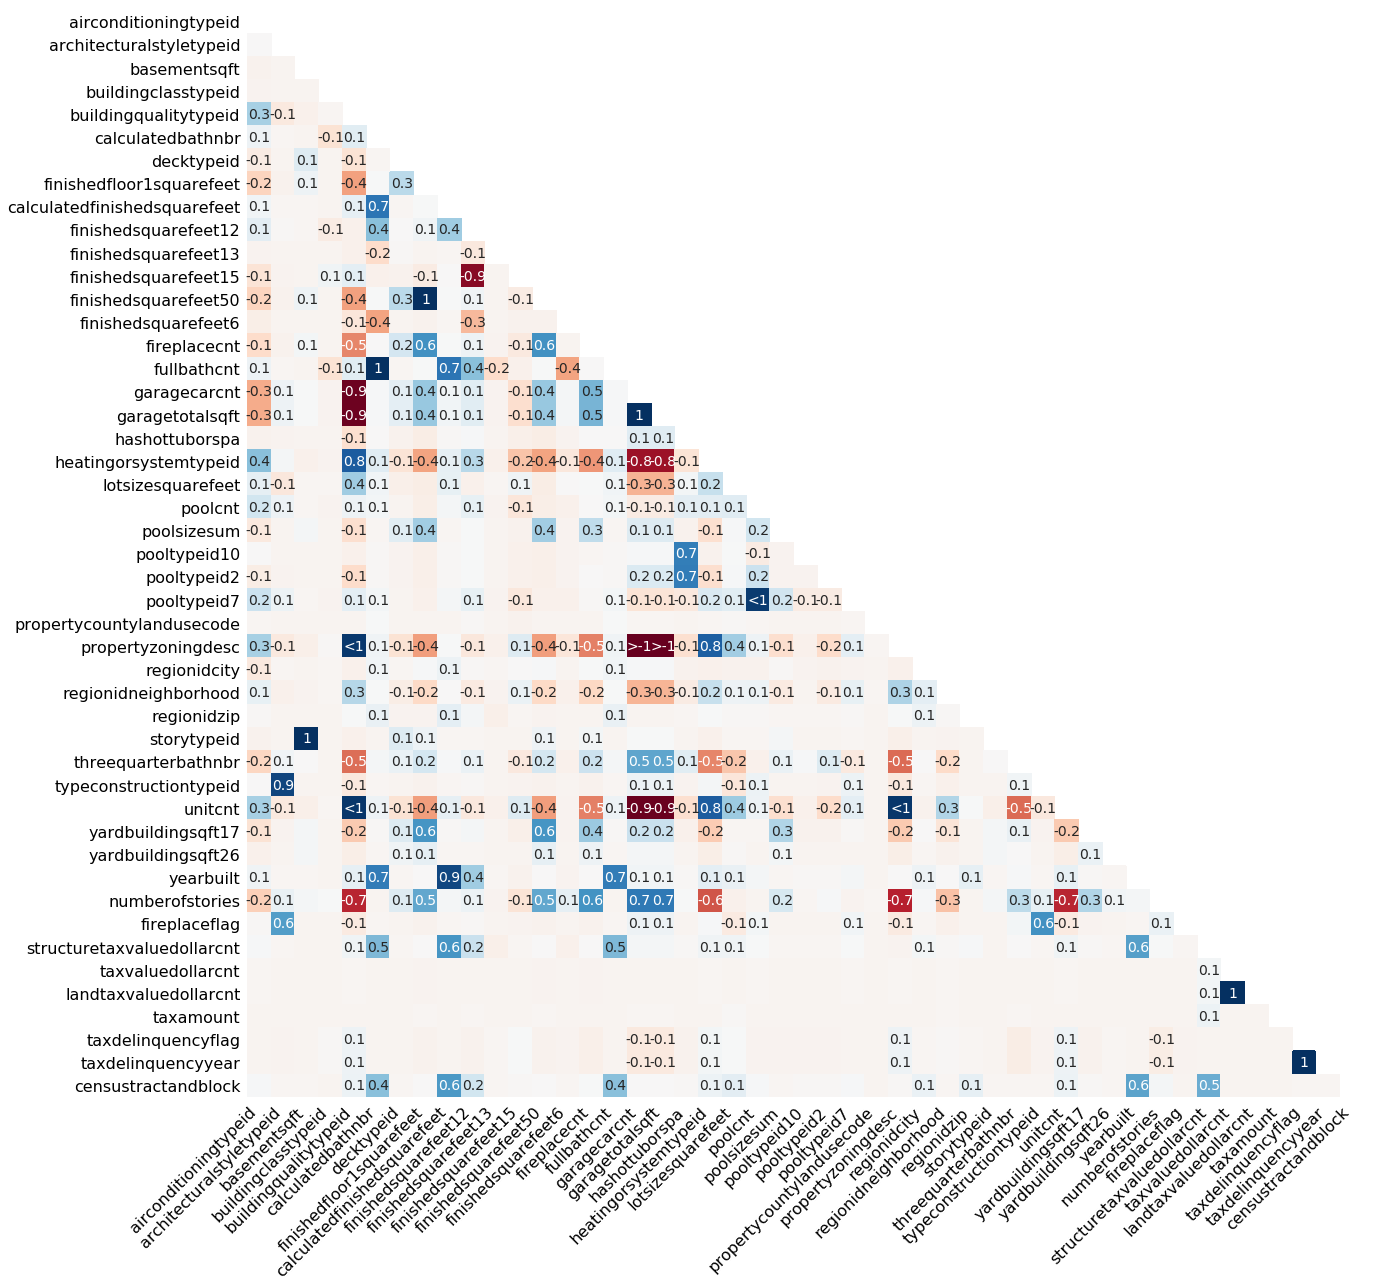

In [42]:
msno.heatmap(merged[missingValueColumns],figsize=(20,20))

In [43]:
merged_dtype = merged.dtypes.reset_index()

In [44]:
merged_dtype.head(8)

,index,0
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64


In [45]:
merged_dtype.columns=["column","column type"]

In [46]:
merged_dtype.groupby("column type").aggregate('count').reset_index()

,column type,column
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [47]:
merged_missing = merged.isnull().sum().reset_index()

In [48]:
merged_missing.head(8)

,index,0
0,parcelid,0
1,logerror,0
2,transactiondate,0
3,transaction_month,0
4,airconditioningtypeid,61494
5,architecturalstyletypeid,90014
6,basementsqft,90232
7,bathroomcnt,0


In [49]:
merged_missing.columns = ["columns","missing value counts"]

In [50]:
merged_missing.head(8)

,columns,missing value counts
0,parcelid,0
1,logerror,0
2,transactiondate,0
3,transaction_month,0
4,airconditioningtypeid,61494
5,architecturalstyletypeid,90014
6,basementsqft,90232
7,bathroomcnt,0


In [51]:
merged.shape[0]

90275

In [52]:
merged_missing["missing ratio"] = \
merged_missing["missing value counts"]/merged.shape[0]

In [53]:
merged_missing.head(8)

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,transaction_month,0,0.000000
4,airconditioningtypeid,61494,0.681185
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
7,bathroomcnt,0,0.000000


In [70]:
pd.options.display.max_rows = 115

In [55]:
merged_missing.head()

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,transaction_month,0,0.000000
4,airconditioningtypeid,61494,0.681185


In [56]:
merged_missing[merged_missing["columns"]=='basementsqft']

,columns,missing value counts,missing ratio
6,basementsqft,90232,0.999524


In [119]:
merged_missing[merged_missing["missing ratio"]<0.3]

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,transaction_month,0,0.000000
7,bathroomcnt,0,0.000000
8,bedroomcnt,0,0.000000
11,calculatedbathnbr,1182,0.013093
14,calculatedfinishedsquarefeet,661,0.007322
15,finishedsquarefeet12,4679,0.051831
20,fips,0,0.000000


In [58]:
len(merged_missing[merged_missing["missing ratio"]>0.8]["columns"])

24

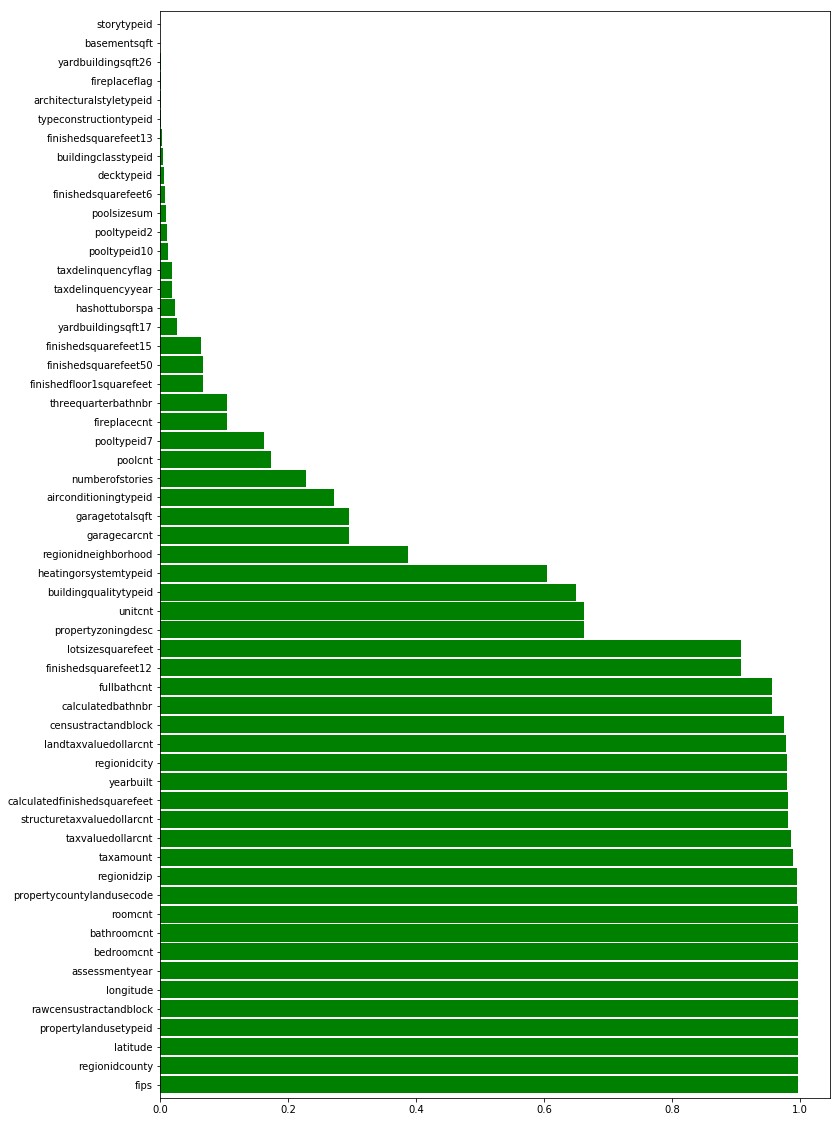

In [59]:
plt.figure(figsize=(12,20))
prop16.drop('parcelid',axis=1).notnull().mean()\
.sort_values(ascending = False).plot(kind = 'barh',color='green', width=0.9)

In [60]:
%who

df	 merged	 merged_dtype	 merged_missing	 merged_t	 missingValueColumns	 msno	 np	 pd	 
plt	 prop16	 prop17	 sns	 train16	 transaction_month	 


In [77]:
np.dtype(prop16['poolcnt'])

dtype('float64')

In [76]:
prop16['poolcnt'].describe().reset_index()

,index,poolcnt
0,count,517534.0
1,mean,1.0
2,std,0.0
3,min,1.0
4,25%,1.0
5,50%,1.0
6,75%,1.0
7,max,1.0


In [78]:
prop16['poolsizesum'].describe().reset_index()

,index,poolsizesum
0,count,27960.000000
1,mean,519.710980
2,std,191.323284
3,min,19.000000
4,25%,430.000000
5,50%,495.000000
6,75%,594.000000
7,max,17410.000000


In [80]:
prop16['numberofstories'].describe()

count    682069.000000
mean          1.401464
std           0.539076
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          41.000000
Name: numberofstories, dtype: float64

In [85]:
prop16['numberofstories'].unique()

array([ nan,   1.,   4.,   2.,   3.,  41.,   5.,   6.,  20.,   7.,  14.,
        17.,   8.])

In [100]:
prop16['garagecarcnt'].value_counts().reset_index().sort_values(by='index')

,index,garagecarcnt
3,0.0,14005
1,1.0,177579
0,2.0,660462
2,3.0,19634
4,4.0,8495
5,5.0,1705
6,6.0,575
7,7.0,266
8,8.0,181
9,9.0,127


In [87]:
prop16['garagecarcnt'].unique()

array([ nan,   2.,   4.,   1.,   3.,   0.,   5.,   7.,   6.,   8.,   9.,
        12.,  11.,  10.,  13.,  14.,  15.,  25.,  21.,  18.,  17.,  24.,
        19.,  16.,  20.])

In [88]:
prop16['garagecarcnt'].describe()

count    883267.000000
mean          1.823517
std           0.610035
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          25.000000
Name: garagecarcnt, dtype: float64

In [89]:
prop16['garagetotalsqft'].describe()

count    883267.000000
mean        383.769357
std         245.443419
min           0.000000
25%         324.000000
50%         441.000000
75%         494.000000
max        7749.000000
Name: garagetotalsqft, dtype: float64

In [90]:
prop16['garagetotalsqft'].unique()

array([   nan,   420.,   525., ...,  2482.,  4568.,  1974.])

In [107]:
prop16['heatingorsystemtypeid'].value_counts().reset_index().sort_values(by='index')

,index,heatingorsystemtypeid
7,1.0,262
0,2.0,1156830
2,6.0,27480
1,7.0,595453
9,10.0,39
11,11.0,16
10,12.0,25
5,13.0,1342
8,14.0,41
6,18.0,586


In [110]:
prop16['buildingqualitytypeid'].value_counts().reset_index().sort_values(by='index')

,index,buildingqualitytypeid
2,1.0,69467
11,2.0,2
10,3.0,6
1,4.0,692160
8,5.0,21
5,6.0,94
0,7.0,1133238
6,8.0,51
7,9.0,25
3,10.0,39713


In [111]:
prop16['buildingqualitytypeid'].describe()

count    1.938488e+06
mean     5.784787e+00
std      1.805352e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      7.000000e+00
max      1.200000e+01
Name: buildingqualitytypeid, dtype: float64

In [114]:
prop16['propertyzoningdesc'].value_counts().reset_index()

,index,propertyzoningdesc
0,LAR1,275029
1,LAR3,67105
2,LARS,54859
3,LBR1N,52750
4,LAR2,48808
5,LARD1.5,39895
6,SCUR2,30459
7,LARD2,30377
8,TORR-LO,26632
9,LARA,26103


In [115]:
prop16['unitcnt'].value_counts().reset_index().sort_values(by='index')

,index,unitcnt
0,1.0,1780051
1,2.0,115652
3,3.0,39830
2,4.0,39877
4,5.0,588
5,6.0,363
7,7.0,167
6,8.0,178
9,9.0,91
8,10.0,97


In [116]:
prop16['unitcnt'].describe()

count    1.977490e+06
mean     1.181171e+00
std      2.447896e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.970000e+02
Name: unitcnt, dtype: float64